# Instructor Do: Random Forests

In [5]:
# Initial imports
import pandas as pd
from pathlib import Path
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
%matplotlib inline


## Loading NJ_Data_cleaned Encoded Data

In [6]:
# Loading data
nj_df = pd.read_csv("Resources/NJ_Data_cleaned.csv")
nj_df.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Direction,Wind_Speed(mph),Precipitation(in),...,Junction,No_Exit,Railway,Station,Stop,Traffic_Signal,Sunrise_Sunset,Hour,Month,Year
0,0,0.01,55.0,35.581625,93.0,29.79,2.5,ENE,6.9,0.02,...,0,0,0,0,0,1,Night,16,11,2016
1,0,0.01,54.0,35.581625,90.0,29.78,4.0,E,12.7,0.00,...,0,0,0,0,0,0,Night,17,11,2016
2,0,0.01,54.0,35.581625,90.0,29.78,4.0,E,12.7,0.00,...,0,0,0,0,0,0,Night,17,11,2016
3,1,0.01,54.5,35.581625,95.0,29.77,4.0,E,8.1,0.01,...,0,0,0,0,0,0,Night,17,11,2016
4,0,0.01,54.0,35.581625,90.0,29.76,4.0,VAR,5.8,0.01,...,0,0,0,0,0,1,Night,19,11,2016


In [7]:
# Encode the data using get_dummies
nj_encoded = pd.get_dummies(nj_df)
nj_encoded.head()

,Severity,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,...,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Thunderstorms and Snow,Weather_Condition_Unavailable,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_Unavailable
0,0,0.01,55.0,35.581625,93.0,29.79,2.5,6.9,0.02,0,...,0,0,0,0,0,0,0,0,1,0
1,0,0.01,54.0,35.581625,90.0,29.78,4.0,12.7,0.00,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0.01,54.0,35.581625,90.0,29.78,4.0,12.7,0.00,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0.01,54.5,35.581625,95.0,29.77,4.0,8.1,0.01,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0.01,54.0,35.581625,90.0,29.76,4.0,5.8,0.01,0,...,0,0,0,0,0,0,0,0,1,0


In [8]:
# Define features set
X = nj_encoded.copy()
X.drop("Severity", axis=1, inplace=True)
X.head()

,Distance(mi),Temperature(F),Wind_Chill(F),Humidity(%),Pressure(in),Visibility(mi),Wind_Speed(mph),Precipitation(in),Amenity,Bump,...,Weather_Condition_Thunder in the Vicinity,Weather_Condition_Thunderstorm,Weather_Condition_Thunderstorms and Rain,Weather_Condition_Thunderstorms and Snow,Weather_Condition_Unavailable,Weather_Condition_Wintry Mix,Weather_Condition_Wintry Mix / Windy,Sunrise_Sunset_Day,Sunrise_Sunset_Night,Sunrise_Sunset_Unavailable
0,0.01,55.0,35.581625,93.0,29.79,2.5,6.9,0.02,0,0,...,0,0,0,0,0,0,0,0,1,0
1,0.01,54.0,35.581625,90.0,29.78,4.0,12.7,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0.01,54.0,35.581625,90.0,29.78,4.0,12.7,0.00,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0.01,54.5,35.581625,95.0,29.77,4.0,8.1,0.01,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0.01,54.0,35.581625,90.0,29.76,4.0,5.8,0.01,0,0,...,0,0,0,0,0,0,0,0,1,0


In [9]:
# Define target vector
y = nj_encoded["Severity"].ravel()
y[:5]

array([0, 0, 0, 1, 0], dtype=int64)

In [10]:
# Balance out two classes
from collections import Counter
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=0)
X_resampled, y_resampled = rus.fit_resample(X, y)
print(sorted(Counter(y_resampled).items()))

[(0, 26906), (1, 26906)]


In [11]:
# Splitting into Train and Test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, random_state=78)

In [12]:
# # Creating StandardScaler instance
# scaler = StandardScaler()

In [13]:
# # Fitting Standard Scaller
# X_scaler = scaler.fit(X_train)

In [14]:
# # Scaling data
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)

## Fitting the Random Forest Model

In [15]:
# Create a random forest classifier
rf_model = RandomForestClassifier(n_estimators=500, max_depth = 4, min_samples_leaf = 5, random_state=78)

In [16]:
# Fitting the model
rf_model = rf_model.fit(X_train, y_train)

## Making Predictions Using the Random Forest Model

In [17]:
# Making predictions using the testing data
predictions = rf_model.predict(X_test)

## Model Evaluation

In [18]:
# Calculating the confusion matrix for y_train
predictions_train = rf_model.predict(X_train)

cm = confusion_matrix(y_train, predictions_train)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_train, predictions_train)

In [19]:
# Displaying results for y_train
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_train, predictions_train))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,12823,7354
Actual 1,5216,14966


Accuracy Score : 0.6885453058797294
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.64      0.67     20177
           1       0.67      0.74      0.70     20182

    accuracy                           0.69     40359
   macro avg       0.69      0.69      0.69     40359
weighted avg       0.69      0.69      0.69     40359



In [20]:
# Calculating the confusion matrix for y_test
cm = confusion_matrix(y_test, predictions)
cm_df = pd.DataFrame(
    cm, index=["Actual 0", "Actual 1"], columns=["Predicted 0", "Predicted 1"]
)

# Calculating the accuracy score
acc_score = accuracy_score(y_test, predictions)

In [21]:
# Displaying results for y_test
print("Confusion Matrix")
display(cm_df)
print(f"Accuracy Score : {acc_score}")
print("Classification Report")
print(classification_report(y_test, predictions))

Confusion Matrix


,Predicted 0,Predicted 1
Actual 0,4289,2440
Actual 1,1725,4999


Accuracy Score : 0.6904036274436929
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.64      0.67      6729
           1       0.67      0.74      0.71      6724

    accuracy                           0.69     13453
   macro avg       0.69      0.69      0.69     13453
weighted avg       0.69      0.69      0.69     13453



## Feature Importance

In [22]:
# Random Forests in sklearn will automatically calculate feature importance
importances = rf_model.feature_importances_
# We can sort the features by their importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.2848281755806594, 'Year'),
 (0.25034687863853267, 'Distance(mi)'),
 (0.08900359690539546, 'Wind_Chill(F)'),
 (0.0750115325186527, 'Weather_Condition_Fair'),
 (0.06883743455612581, 'Weather_Condition_Clear'),
 (0.04889383347400715, 'Weather_Condition_Overcast'),
 (0.01976578799076981, 'Month'),
 (0.019095260756503866, 'Traffic_Signal'),
 (0.018382206963255834, 'Wind_Speed(mph)'),
 (0.018218642843040644, 'Weather_Condition_Cloudy'),
 (0.01646041046642117, 'Crossing'),
 (0.01588609859453957, 'Weather_Condition_Scattered Clouds'),
 (0.01018736088456631, 'Sunrise_Sunset_Unavailable'),
 (0.007791543457113152, 'Temperature(F)'),
 (0.00690812780690011, 'Humidity(%)'),
 (0.006089107609203446, 'Pressure(in)'),
 (0.005894574766521492, 'Hour'),
 (0.0057668800044728425, 'Weather_Condition_Unavailable'),
 (0.0054163126015601415, 'Visibility(mi)'),
 (0.0040878607902944, 'Stop'),
 (0.0029140555135294885, 'Railway'),
 (0.0022284205585710627, 'Give_Way'),
 (0.0021800961630359657, 'Precipitation(in)'

<Axes: title={'center': 'Features Importances'}, ylabel='1'>

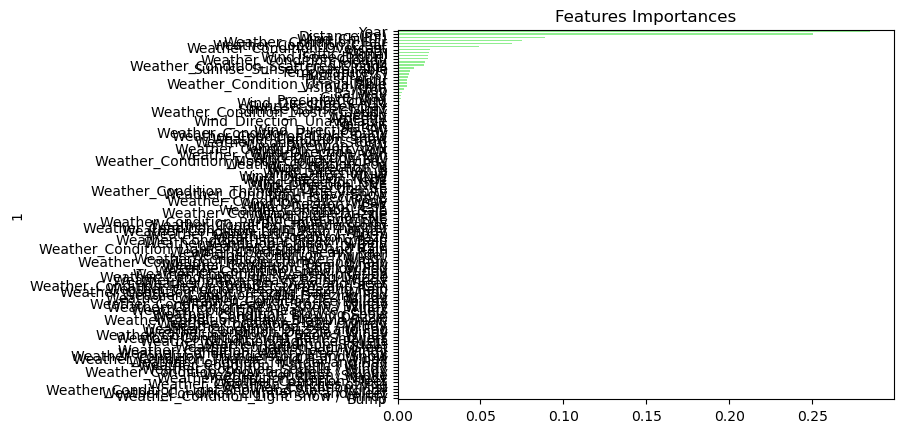

In [23]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)